## Top Neighborhoods to  Raise a Family in Houston

# Introduction

Toronto is one of the most diverse cities in Canada.According to the 2016 census 51.5% of Torontos population is composed of visible minories.which has greatly increased from 13.6% in 1981.it is the largest city in Canada.

# Business Problem

what are some of the best neighborhoods to raise a family. We will look at what the city has to offer in the form of activities and things to do and also opportunities to e exposed to other cultures.  I will use FourSquare to look at different venues in the neighborhoods to determine which has a good mix of family friendly entertainment.

# Data Source

I will use data from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M as well as using Foursquare to find venues.

# Methodology

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from geopy.geocoders import Nominatim

In [4]:

! pip install folium==0.5.0

In [5]:
import folium

In [6]:

import requests
from pandas.io.json import json_normalize 

In [7]:
from sklearn.cluster import KMeans

In [8]:
import matplotlib.cm as cm
import matplotlib.colors as color

In [9]:
from pandas import ExcelFile

In [10]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.head

<bound method NDFrame.head of     Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                         Neighbourhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177         

In [11]:
df =df[df["Borough"] != "Not assigned"]
df


,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [12]:
df.rename(columns={'Postal_Code':'Postal Code'},inplace=True)
df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [13]:

#Now combine all the neighbourhoods with the same postal codes
df = df.groupby(["Postal Code","Borough"])["Neighbourhood"].apply(list)
df = df.sample(frac=1).reset_index()
df["Neighbourhood"] = df["Neighbourhood"].str.join(', ')
df.head()

,Postal Code,Borough,Neighbourhood
0,M8V,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores"
1,M4H,East York,Thorncliffe Park
2,M6C,York,Humewood-Cedarvale
3,M1X,Scarborough,Upper Rouge
4,M1G,Scarborough,Woburn


In [14]:

df2 = pd.read_csv("https://cocl.us/Geospatial_data")
df2

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [15]:

data = df.join(df2.set_index('Postal Code'), on='Postal Code', how='inner')
data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M8V,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.605647,-79.501321
1,M4H,East York,Thorncliffe Park,43.705369,-79.349372
2,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
3,M1X,Scarborough,Upper Rouge,43.836125,-79.205636
4,M1G,Scarborough,Woburn,43.770992,-79.216917
...,...,...,...,...,...
98,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
99,M3A,North York,Parkwoods,43.753259,-79.329656
100,M2P,North York,York Mills West,43.752758,-79.400049
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [16]:
#Take only those neighborhoods that contain the word Toronto
data = data[data['Borough'].str.contains('Toronto')].reset_index(drop=True)
data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
1,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
3,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [17]:
print("\n{} neighborhoods found in the city of Toronto.".format(data.shape[0]))


39 neighborhoods found in the city of Toronto.


In [18]:
Toraddress = 'Toronto'
geolocator = Nominatim(user_agent="Toronto_explorer")
Tlocation = geolocator.geocode(Toraddress)
Tlatitude = Tlocation.latitude
Tlongitude = Tlocation.longitude
print('The geographical coordinate of Toronto are {}, {}.'.format(Tlatitude,Tlongitude))

The geographical coordinate of Toronto are 43.6534817, -79.3839347.


Here is a Visualization of the Neighbourhoods in Toronto

In [19]:
map_tor = folium.Map(location=[Tlatitude, Tlongitude], zoom_start=11, width='100%', height='100%')

for lat, lng, borough, neighborhood in zip(data['Latitude'], data['Longitude'], data['Borough'], data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_tor)


map_tor

In [20]:

CLIENT_ID = '4E1ZI35XZZ0MXK0ZZEXWVSXYJICMP1MLLR1IINGKFPU5GKNR' # your Foursquare ID
CLIENT_SECRET = '4MFZ50E0FMVXXJYMAV5LS1PU0GIMJW3Q1LRDSLVFC55JCRXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 4E1ZI35XZZ0MXK0ZZEXWVSXYJICMP1MLLR1IINGKFPU5GKNR
CLIENT_SECRET:4MFZ50E0FMVXXJYMAV5LS1PU0GIMJW3Q1LRDSLVFC55JCRXX


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
toronto_venues = getNearbyVenues(data['Neighbourhood'], data['Latitude'], data['Longitude'])


Queen's Park, Ontario Provincial Government
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Central Bay Street
Runnymede, Swansea
Lawrence Park
St. James Town
Richmond, Adelaide, King
Studio District
Little Portugal, Trinity
North Toronto West, Lawrence Park
First Canadian Place, Underground city
Davisville
Regent Park, Harbourfront
Stn A PO Boxes
Brockton, Parkdale Village, Exhibition Place
The Danforth West, Riverdale
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
The Beaches
Kensington Market, Chinatown, Grange Park
Harbourfront East, Union Station, Toronto Islands
Church and Wellesley
Dufferin, Dovercourt Village
Moore Park, Summerhill East
Forest Hill North & West, Forest Hill Road Park
Commerce Court, Victoria Hotel
The Annex, North Midtown, Yorkville
Roselawn
Christie
Berczy Park
Davisville North
India Bazaar, The Beaches West
High Park, The Junction South
Garden District, Ryerson
Toronto Dominion Cent

In [24]:

print(toronto_venues.shape)
toronto_venues.head()

(1624, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Queen's Park,43.663946,-79.392180,Park
1,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Mercatto,43.660391,-79.387664,Italian Restaurant
2,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,NEO COFFEE BAR,43.660130,-79.385830,Coffee Shop
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Bar Volo,43.665462,-79.385692,Beer Bar
4,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,T-Swirl Crepe,43.663452,-79.384125,Creperie


In [25]:
toronto_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,65,65,65,65,65,65
Christie,16,16,16,16,16,16
Church and Wellesley,79,79,79,79,79,79
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,38,38,38,38,38,38



Since we are trying to find out what are the different kinds of venue categories present in each neighbourhood and then calculate the top 10 common venues to base our similarity on, we use the One Hot Encoding to work with our categorical datatype of the venue categories. This helps to convert the categorical data into numeric data.

In [26]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Grouping and calculating the mean
Toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

what are some top venues in the neighborhood?

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

This are some of the most popular spots in the neighborhoods ranked 

In [30]:
# create a new dataframe for Toronto
neighborhoods_venues_sorted_Toronto = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_Toronto['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted_Toronto.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_Toronto.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Bakery,Cheese Shop,Farmers Market,Restaurant,Beer Bar,Basketball Stadium,Beach
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Furniture / Home Store,Burrito Place,Italian Restaurant,Stadium,Restaurant,Intersection,Bar
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Yoga Studio,Auto Workshop,Pizza Place,Comic Shop,Restaurant,Burrito Place,Brewery,Skate Park,Smoke Shop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Terminal,Airport Lounge,Airport Service,Boutique,Coffee Shop,Plane,Boat or Ferry,Harbor / Marina,Rental Car Location,Airport Gate
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Bubble Tea Shop,Salad Place,Thai Restaurant,Burger Joint,Yoga Studio,Korean Restaurant


Now we will cluster Similar neighborhoods

In [31]:

# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 2], dtype=int32)

In [32]:
Toronto_data = data

Toronto_data = Toronto_data.join(neighborhoods_venues_sorted_Toronto.set_index('Neighborhood'), on='Borough')

Toronto_data.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,M4M,East Toronto,Studio District,43.659526,-79.340923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a lot of Nan Values which needs to be dropped

In [41]:
Toronto_data_nonan = Toronto_data.dropna(subset=['Cluster Labels'])

KeyError: ['Cluster Labels']

In [34]:

Toronto_data.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,M4M,East Toronto,Studio District,43.659526,-79.340923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
!pip3 install KMeans


  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=12363 sha256=57d6384e6bf6067987a491fbb8f4f93285eea5fcb6679b9cc64e0f432824c08c
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built KMeans


In [56]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)


In [59]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 


TypeError: 'int' object is not subscriptable

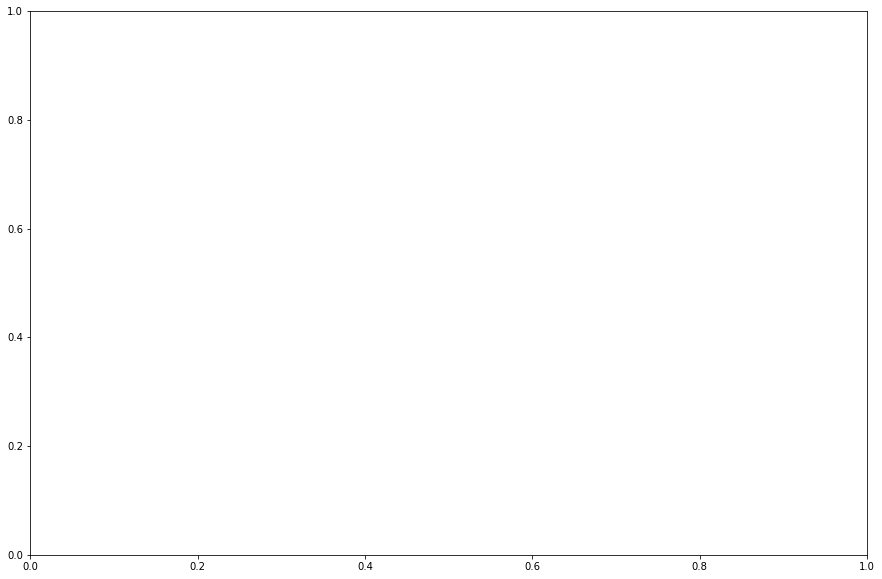

In [80]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (kmeans.labels_ == k)
    
    # define the centroid, or cluster center.
    cluster_center = kclusters[6]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title(kmeans)

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

## Results

Toronto is a very nice city with a lot of entertainment venues. Based on the different types of food its a multicultural city where it would be great to raise a family and they would have the opportunity to learn about different cultures.There are quite a few things to do for example there is bowling, ferry, stadium for sports events, skate park, yoga studio, comic shops. There are other important information such as crime statistics, Education System ratings that I didnt have that can provide a well rounded picture.